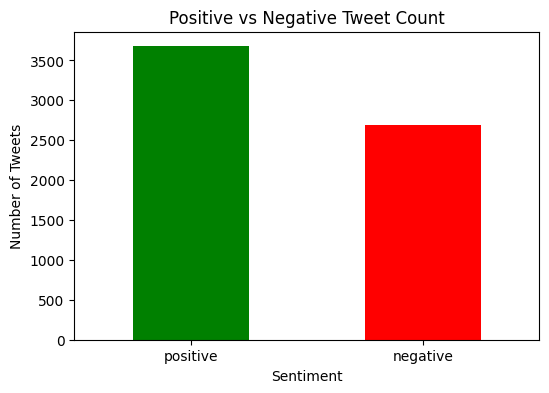

In [7]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('tweets.csv')

# Custom stopwords list
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
    'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Sentiment scoring with TextBlob
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count positive & negative tweets
sentiment_counts = df['sentiment'].value_counts()

# Visualization
plt.figure(figsize=(6, 4))
sentiment_counts[['positive', 'negative']].plot(kind='bar', color=['green', 'red'])
plt.title('Positive vs Negative Tweet Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()
